In [1235]:
%cd ~/Work/Expts/StressMem
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import ttest_ind
from numpy import random
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/mlm2/Work/Expts/StressMem


In [1442]:
uname = !whoami
uname = uname[0]
path2words = '/Users/' + uname + '/Work/Expts/StressMem/Stimuli/'

### Handling the Imageability data

In [1443]:
df_img = pd.read_csv(path2analysis + 'mturk_img_ratings.csv', header = 0)
df_img = df_img[df_img.imagability_complete == 2]
df_img = df_img.transpose()
df_img.reset_index(level=0, inplace=True)
df_img_just_words = df_img[3:348] # we just care about the words for now
df_img_just_words = df_img_just_words.apply(lambda x: pd.to_numeric(x, errors='ignore')) #Need to make all rows numeric
df_img_just_words['Imageability'] = df_img_just_words.sum(axis=1)
df_img_just_words['Imageability'] = df_img_just_words['Imageability'].div(50)
df_img_just_words = df_img_just_words.rename(columns={'index': 'Word'})
df_img_just_words.tail()

,Word,0,1,2,3,5,7,8,9,11,...,51,52,53,54,55,57,58,59,60,Imageability
343,upbeat,1.0,5.0,3.0,2.0,4.0,4.0,5.0,7.0,4.0,...,5.0,5.0,5.0,2.0,4.0,3.0,6.0,2.0,6.0,3.84
344,recognition,3.0,5.0,2.0,3.0,4.0,3.0,1.0,7.0,3.0,...,5.0,7.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0,3.36
345,vermin,7.0,7.0,6.0,6.0,3.0,7.0,7.0,7.0,1.0,...,6.0,7.0,4.0,4.0,3.0,5.0,5.0,5.0,7.0,4.78
346,waste,7.0,6.0,6.0,5.0,5.0,7.0,7.0,7.0,5.0,...,6.0,7.0,5.0,3.0,4.0,5.0,2.0,4.0,5.0,4.42
347,miserable,2.0,6.0,5.0,4.0,4.0,4.0,6.0,7.0,5.0,...,5.0,7.0,4.0,2.0,2.0,5.0,6.0,2.0,2.0,3.66


### Balancing the list

In [1444]:
df = pd.read_csv(path2words + 'WordsListF.csv')
del df['Unnamed: 0']
del df['ValenceStand']
df.head()

,Word,MeanValence,MeanArousal,val,letters,frequency,Concreteness,Img,pos,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,abandonment,2.63,4.95,0,11,49,2.54,3.48,noun,NaN,NaN,NaN
1,ache,3.27,4.30,0,4,127,3.43,443.00,noun,NaN,NaN,NaN
2,alone,3.85,4.00,0,5,15735,2.86,480.00,noun,NaN,NaN,NaN
3,angst,3.50,5.76,0,5,47,1.96,NaN,adj,NaN,NaN,NaN
4,annoyance,2.95,4.10,0,9,25,2.14,NaN,noun,NaN,NaN,NaN


In [1428]:
df = df.merge(df_img_just_words, how = 'outer')
df = df[['Word', 'MeanValence', 'MeanArousal', 'val', 'letters', 'frequency', 'Concreteness', 'pos', 'Imageability']]
df = df.drop_duplicates('Word') # we had a few repeats
df = df[pd.notnull(df['Imageability'])]# we didn't include "focus" in the MTurk study, so img is blank
df = df[pd.notnull(df['val'])]
df = df[df.Word != 'bummer']
df = df[df.Word != 'clingy']
df = df[df.Word != 'comatose']
df = df[df.Word != 'deadbeat']
df = df[df.Word != 'faker']
df = df[df.Word != 'hag']
df = df[df.Word != 'lowlife']
df = df[df.Word != 'mousy']
df = df[df.Word != 'scumbag']
df = df[df.Word != 'sleaze']
df = df[df.Word != 'wannabe']
df = df[df.Word != 'kisser']
df = df[df.Word != 'longevity']
df = df[df.Word != 'pizzazz']
df = df[df.Word != 'upbeat']
df = df[df.Word != 'angst']
df = df[df.Word != 'nutcase']
df = df[df.Word != 'newlywed'] # the LSA thing doesn't know these words...there's prob an easier way to do this...
df.tail()

,Word,MeanValence,MeanArousal,val,letters,frequency,Concreteness,pos,Imageability
340,willingness,6.43,4.25,1.0,11.0,68.0,1.81,noun,3.16
341,winner,7.86,6.53,1.0,6.0,1592.0,3.21,noun,4.64
342,wise,7.42,4.46,1.0,4.0,1452.0,1.97,adj,3.46
343,witty,7.25,5.65,1.0,5.0,163.0,2.21,adj,3.30
344,zest,6.76,5.41,1.0,4.0,35.0,2.27,noun,2.78


In [1239]:
#gets two new random lists
def getnewneglist():
    sampled_dfneg = dfneg.sample(100)
    return sampled_dfneg

# creating a random sample of 100 positive words
def getnewposlist():
    sampled_dfpos = dfpos.sample(100)
    return sampled_dfpos


In [1240]:
# checks the ttest for the new lists given a column name
def checknewsig(column_name):
    return ttest_ind(b[column_name], a[column_name])

In [1241]:
# makes a df with the p's and t's of the words
def makepdf():
    pchart = pd.DataFrame({'p':[checknewsig('letters').pvalue, 
                                   checknewsig('MeanArousal').pvalue, 
                                  checknewsig('frequency').pvalue, 
                                   checknewsig('Concreteness').pvalue,
                                   checknewsig('Imageability').pvalue,
                           checknewsig('frequency_stand').pvalue],
                          't':[checknewsig('letters').statistic, 
                                   checknewsig('MeanArousal').statistic, 
                                  checknewsig('frequency').statistic, 
                                   checknewsig('Concreteness').statistic,
                                  checknewsig('Imageability').statistic, 
                          checknewsig('frequency_stand').statistic]},
                       index=['letters', 'MeanArousal', 'frequency','Concreteness', 'Imageability', 'frequency_stand'])
    return pchart
    

In [1242]:
# checks the given series to see if columns are > .05
def checkpdf(x):
    return x.loc['frequency', 'p'] > .05 and x.loc['MeanArousal','p'] > .05 and x.loc['letters','p'] > .05 and x.loc['Imageability','p'] > .001 and x.loc['Concreteness','p'] > .05
    

In [1243]:
# not using this anymore but keep for reference
def main():
    a = getnewneglist()
    b = getnewposlist()
    if checkpdf(makepdf()) == True:
        makepdf().to_csv('p_values.csv')
        a.append(b).to_csv('balanced_words.csv')
    else:
        return main()

In [1223]:
main()

**Stem fixes changed by hand:**  
disgust-->defect  
idiocy-->disaster  
useless-->incapable  
hopeless-->fool  
friendless-->lunatic  
grateful-->comfortable  
positive-->dreamer  


**To keep LSA balanced:**  
scum-->disaster  
genius-->jolly  
generous-->legend  

In [1477]:
ab = pd.read_csv(path2words + 'balanced_words_option8_WORKING.csv')
ab['frequency_stand'] = pd.to_numeric(ab.frequency_stand, errors='raise')
a = ab[ab.val == 0]
b = ab[ab.val == 1]
print ('Negative Words:')
print (a.mean()) # negatives have a few more nouns
print ('--------------------')
print ('Positive Words:')
print (b.mean())

Negative Words:
Unnamed: 0          84.5100
MeanValence          2.7713
MeanArousal          4.6941
val                  0.0000
letters              7.3000
frequency          780.5400
Concreteness         2.6057
Imageability         3.5204
frequency_stand     15.3046
dtype: float64
--------------------
Positive Words:
Unnamed: 0          256.7700
MeanValence           7.1568
MeanArousal           4.6168
val                   1.0000
letters               7.4400
frequency          1215.4800
Concreteness          2.4565
Imageability          3.6538
frequency_stand      23.8333
dtype: float64


In [1478]:
# looking at part of speech....
ab.groupby('val')['pos'].value_counts()

val  pos 
0    noun    60
     adj     40
1    noun    55
     adj     45
Name: pos, dtype: int64

In [1480]:
makepdf()

,p,t
letters,0.661580,0.438392
MeanArousal,0.526905,-0.633857
frequency,0.233976,1.193821
Concreteness,0.156396,-1.422703
Imageability,0.168153,1.383226
frequency_stand,0.233951,1.193885


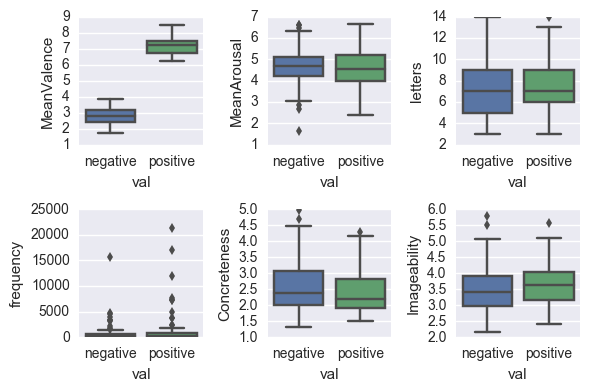

In [1432]:
# from Dan's notebook
ab['val'] = ab['val'].replace(to_replace=[0,1],value=['negative','positive'])
f = plt.figure()
ct = 1
ab.Imageability = pd.to_numeric(ab.Imageability)
for val in ['MeanValence','MeanArousal','letters','frequency','Concreteness','Imageability']:
    cumval = 230 + ct
    ax = f.add_subplot(cumval)
    sns.boxplot(y=val,x='val',data=ab)
    ct = ct + 1
f.tight_layout()

In [1487]:
#any duplicates?
print (ab.Word.count())
ab.drop_duplicates('Word')
print (ab.Word.count())

200
200


In [1481]:
for i, row_i in ab.iterrows():
    stem = row_i.Word[:3]
    matches = list(filter(lambda x: row_i.Word[:3] in x[:3], ab.Word))
    print (i, matches)

0 ['turnoff']
1 ['pest']
2 ['loser']
3 ['captive', 'capable']
4 ['worthless']
5 ['cynic']
6 ['traitor', 'traveler']
7 ['distress', 'disappointment', 'disaster', 'disgrace', 'disgusting']
8 ['jerk']
9 ['selfish']
10 ['bastard']
11 ['distress', 'disappointment', 'disaster', 'disgrace', 'disgusting']
12 ['insulting', 'insecure']
13 ['unwanted', 'unwelcome']
14 ['gloom']
15 ['filth']
16 ['dull']
17 ['lazy']
18 ['failure']
19 ['untrustworthy']
20 ['stress']
21 ['prick']
22 ['terrible', 'terrified']
23 ['unhealthy']
24 ['alone']
25 ['inadequate']
26 ['regret']
27 ['bitterness']
28 ['mess']
29 ['irritating', 'irresponsible']
30 ['garbage']
31 ['annoying']
32 ['irritating', 'irresponsible']
33 ['stinky']
34 ['unwanted', 'unwelcome']
35 ['phony']
36 ['degenerate']
37 ['heartbroken', 'headache', 'healthy', 'healer']
38 ['reject']
39 ['hesitation']
40 ['sad']
41 ['insulting', 'insecure']
42 ['awkward']
43 ['hypocrite']
44 ['shame']
45 ['anxiety']
46 ['distress', 'disappointment', 'disaster', 'dis

### Looking at LSA

http://lsa.colorado.edu/  
To get the csvs, c&p the negative and positive words seperately into the matrix comparison, then c&p the results into excel. 

In [1446]:
# add the negative LSA csv
lsa = pd.read_csv(path2words + 'option8_lsa_neg_WORKING.csv')
neg = lsa
values = lsa[lsa['Document']].values
lower_triangular = values[np.tril_indices(values.shape[0], -1)]
lsa = pd.DataFrame({'Neg': lower_triangular})

In [1447]:
# add the positive LSA csv
pos = pd.read_csv(path2words + 'option8_lsa_pos_WORKING.csv')
values = pos[pos['Document']].values
lower_triangular = values[np.tril_indices(values.shape[0], -1)]
lsa['Pos'] = lower_triangular
lsa.count()

Neg    4950
Pos    4950
dtype: int64

In [1448]:
# some descriptives
lsa.describe()

,Neg,Pos
count,4950.000000,4950.000000
mean,0.105388,0.105109
std,0.099394,0.094351
min,-0.150000,-0.140000
25%,0.030000,0.040000
50%,0.090000,0.090000
75%,0.160000,0.160000
max,0.620000,0.740000


In [1449]:
ttest_ind(lsa['Neg'], lsa['Pos']) # are they different?

Ttest_indResult(statistic=0.14312420754904781, pvalue=0.88619500028635723)